In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

import astropy.units as u
import matplotlib as mpl
import sys 
sys.path.append("..")
from plot_OpSims import plot_OpSims_color_excess_redshift

In [3]:
# import maf python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

In [4]:
# import convenience functions
import sys 
sys.path.append("../../LSST_OpSim")
from Scripts_NBs.opsimUtils import *

## Load the results
We first load the results of the run into memory. We will read jointly the FBS v1.5 and FBS v1.6 results, and will differentiate at the time of plotting.

In [5]:
your_username = "rjassef"
folder_mafoutput = "Color_EM5"
resultDbPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}'.format(
    your_username, folder_mafoutput)
metricDataPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}/MetricData/'.format(
    your_username, folder_mafoutput)

In [6]:
# get a dictionary of resultDb from given directory
resultDbs = getResultsDbs(resultDbPath)

In [7]:
# retrieve metricBundles for each opsim run and store them in a dictionary
bundleDicts_raw = dict()
for runName in resultDbs:
    bundleDicts_raw[runName] = bundleDictFromDisk(resultDbs[runName], runName, metricDataPath)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slic

In [8]:
#Rearrange the bundleDicts_raw dictionary so that the keys are always the same as for the first run.
dbRuns = list(resultDbs.keys())
Keys = list(bundleDicts_raw[dbRuns[0]].keys())
bundleDicts = dict()
for runName in dbRuns:
    bundleDicts[runName] = dict()
    Keys_raw = bundleDicts_raw[runName]
    for Key in Keys:
        for Key_raw in Keys_raw:
            if Key[1]==Key_raw[1]:
                bundleDicts[runName][Key] = bundleDicts_raw[runName][Key_raw]

In [10]:
# check keys
bd_keys = list(bundleDicts[dbRuns[15]].keys())
print(bd_keys, len(list(bundleDicts.keys())), len(list(bundleDicts_raw.keys())))
print(Keys)

[(1, 'Exgalm5_color_with_cuts_AGN_ug_mean'), (2, 'Exgalm5_color_with_cuts_AGN_gr_mean'), (3, 'Exgalm5_color_with_cuts_AGN_ri_mean'), (4, 'Exgalm5_color_with_cuts_AGN_iz_mean'), (5, 'Exgalm5_color_with_cuts_AGN_zy_mean')] 46 46
[(1, 'Exgalm5_color_with_cuts_AGN_ug_mean'), (2, 'Exgalm5_color_with_cuts_AGN_gr_mean'), (3, 'Exgalm5_color_with_cuts_AGN_ri_mean'), (4, 'Exgalm5_color_with_cuts_AGN_iz_mean'), (5, 'Exgalm5_color_with_cuts_AGN_zy_mean')]


### i = 24.5

In [37]:
imag = 24.5

In [38]:
from quasar_colors.quasar_colors import Temple_colors

In [39]:
zmin = 0
zmax = 6
dz = 0.1
zs = np.arange(zmin, zmax, dz)

filterdist_indx4_v1.5_10yrs -0.7088393091162111
filterdist_indx3_v1.5_10yrs -1.6130224478571265
greedy_footprint_v1.5_10yrs -0.000628067752128203
filterdist_indx1_v1.5_10yrs 0.4407113633181723
filterdist_indx6_v1.5_10yrs 0.3048973678970395
filterdist_indx3_v1.5_10yrs 0.5712002804427669
filterdist_indx1_v1.5_10yrs 0.5635264296118851
filterdist_indx6_v1.5_10yrs 0.8626974664991618
twilight_neo_mod1_v1.5_10yrs 0.3461940594026718
var_expt_v1.5_10yrs 0.8368011887280193


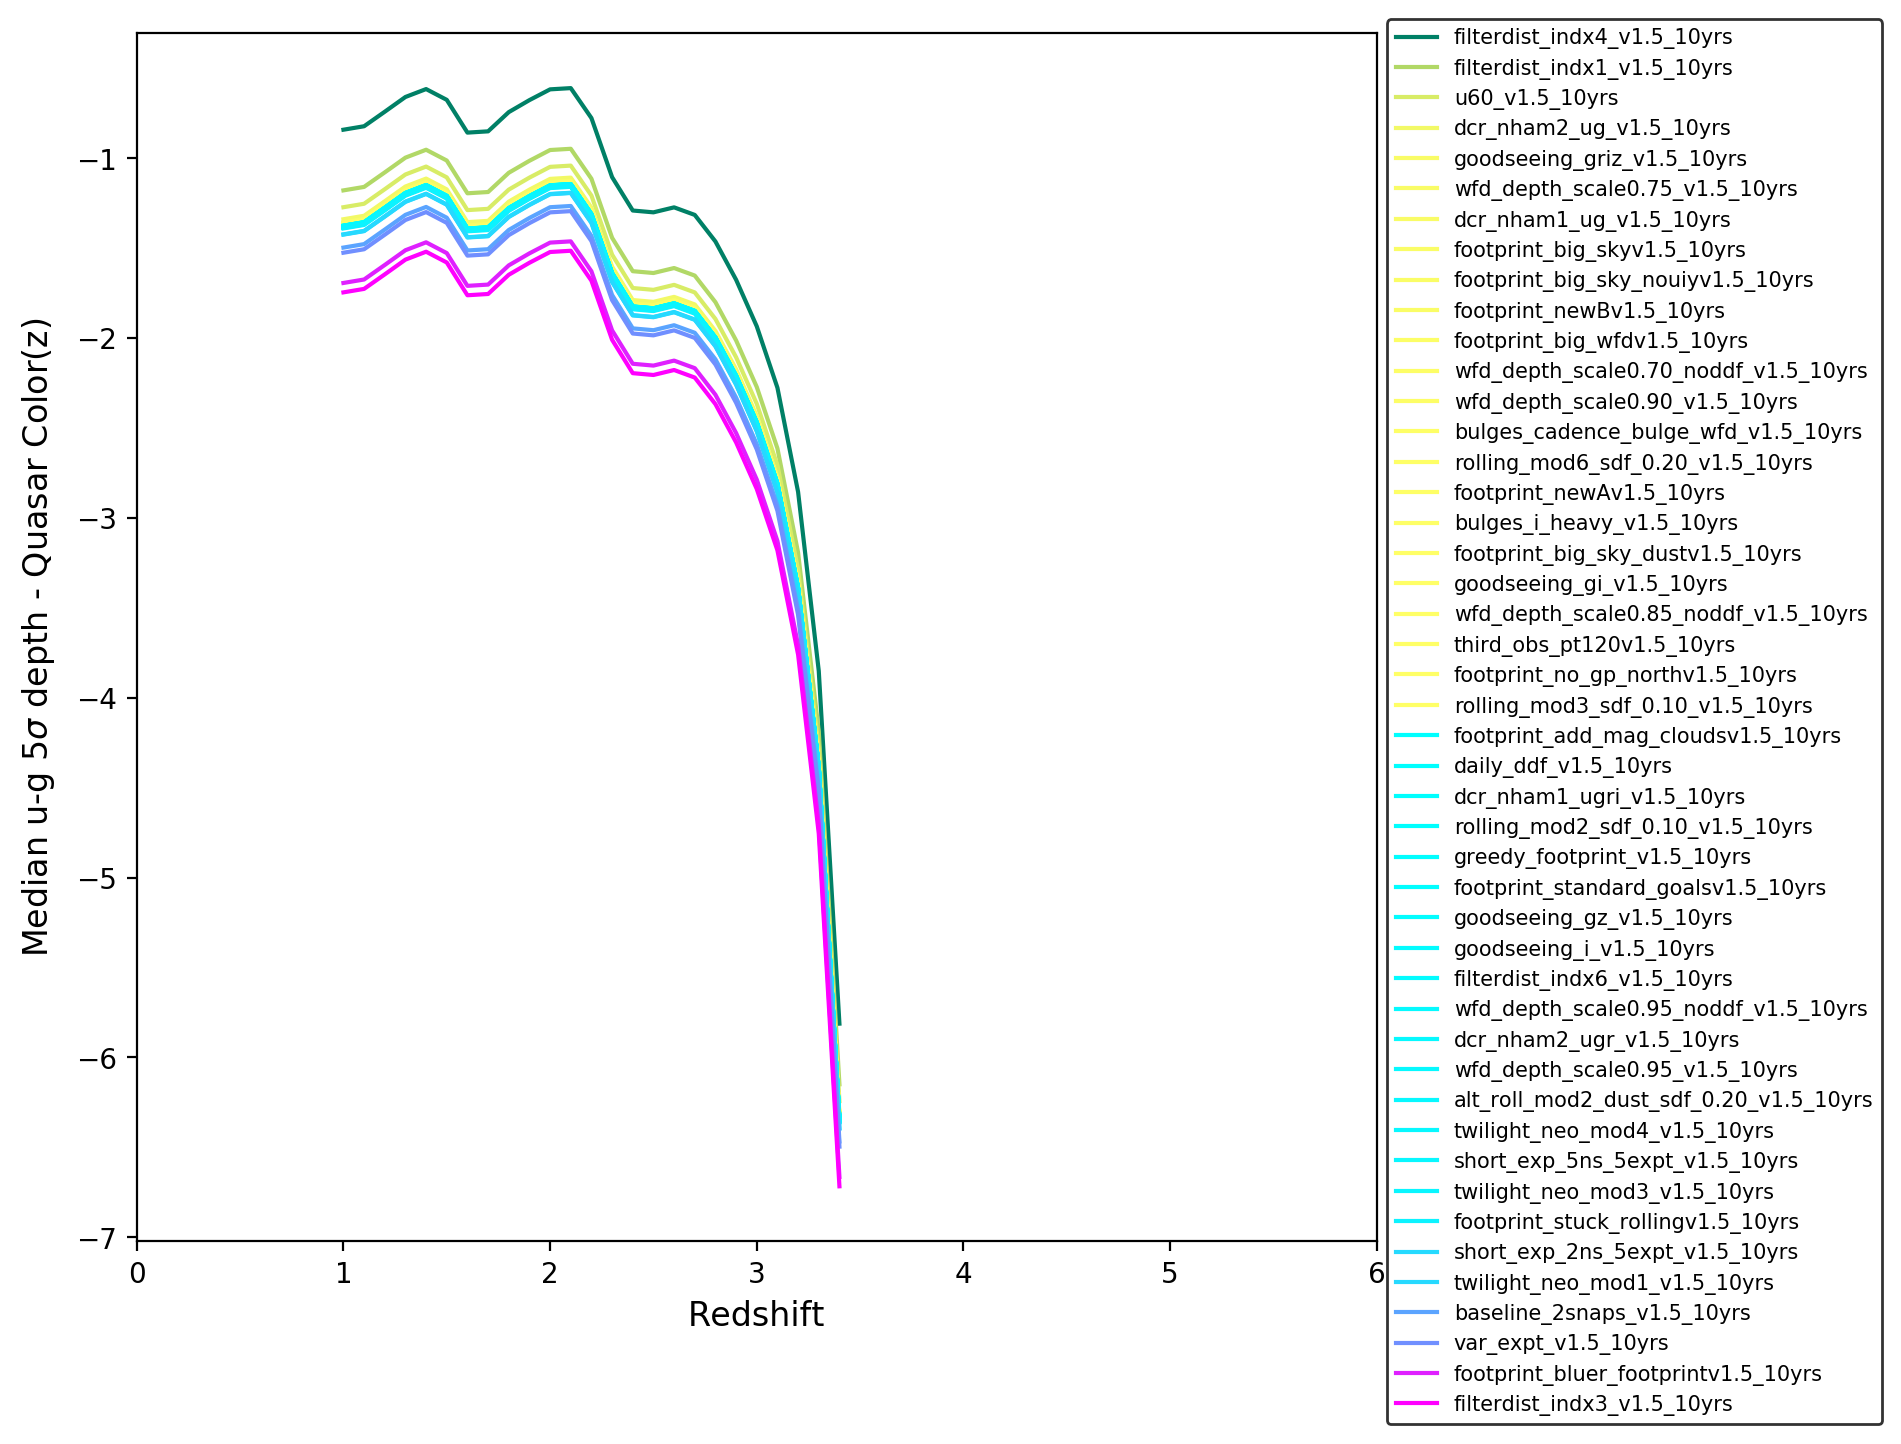

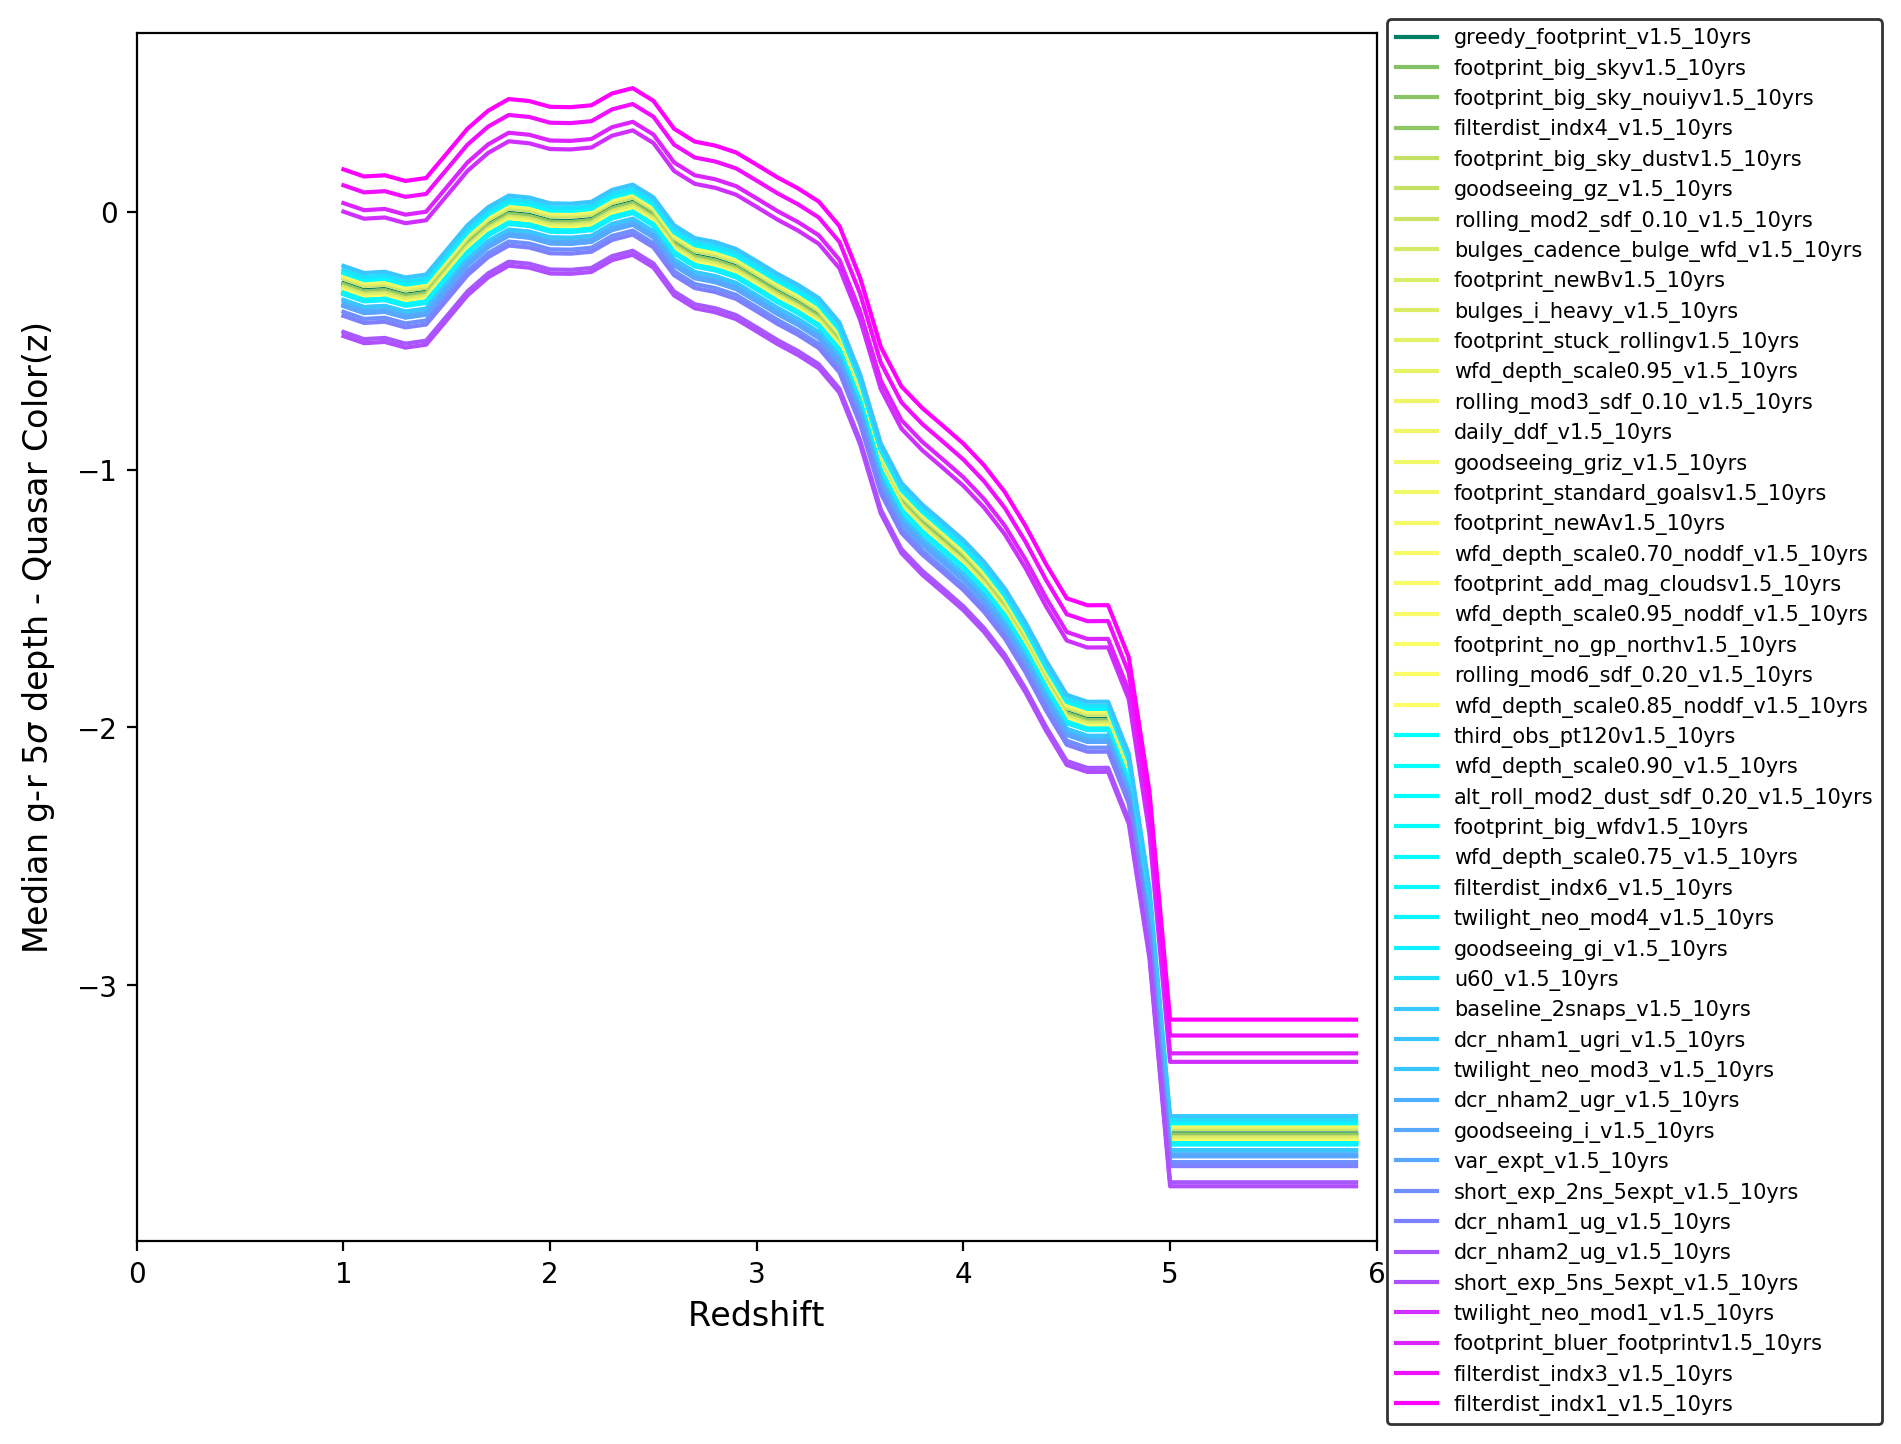

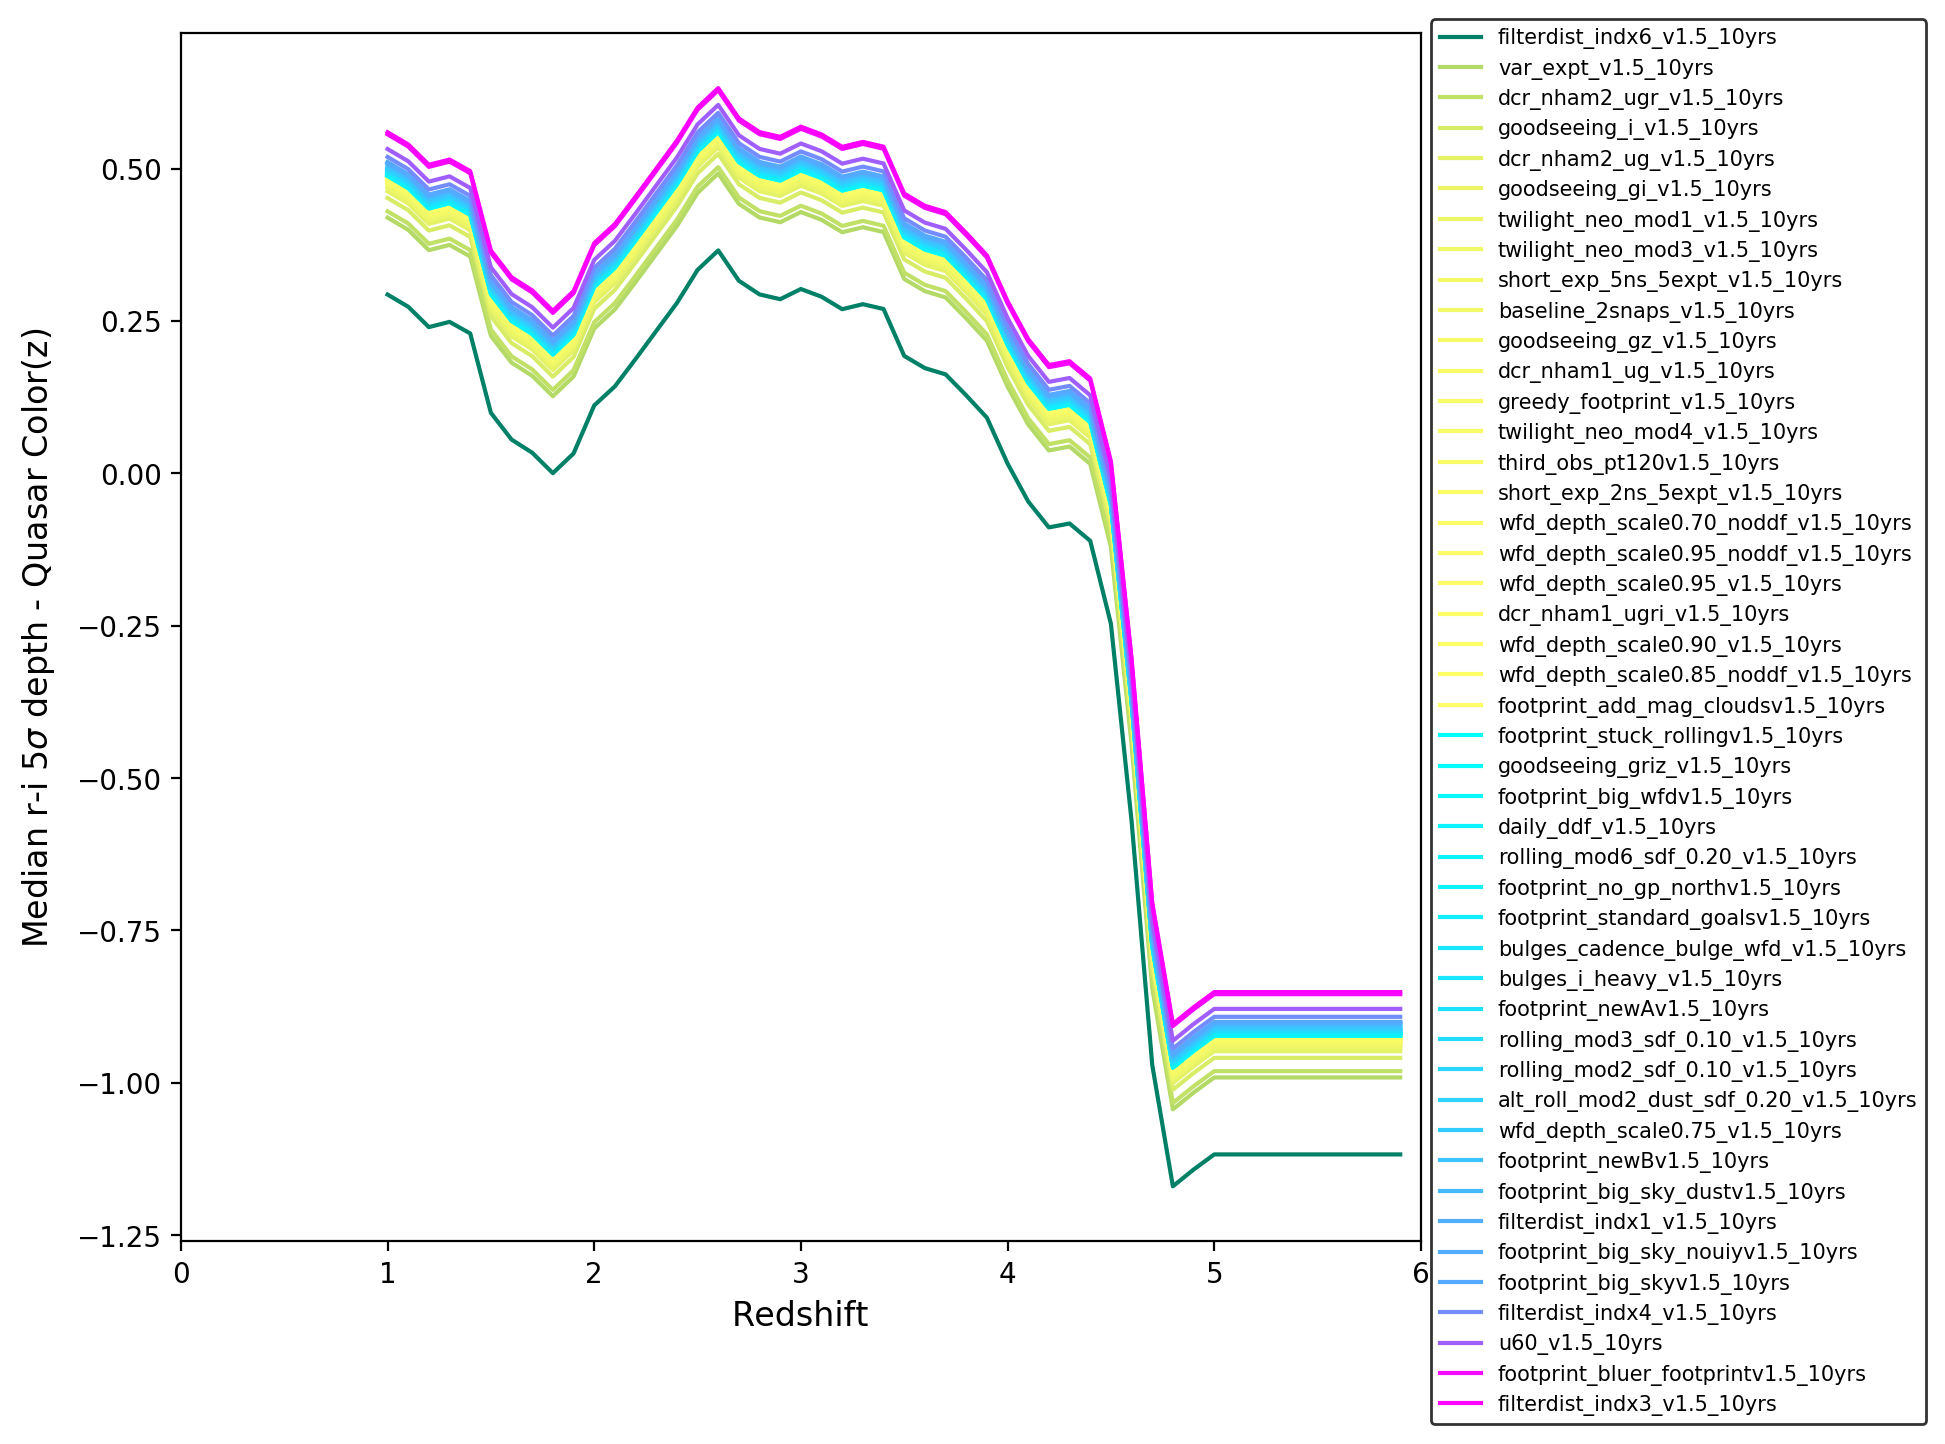

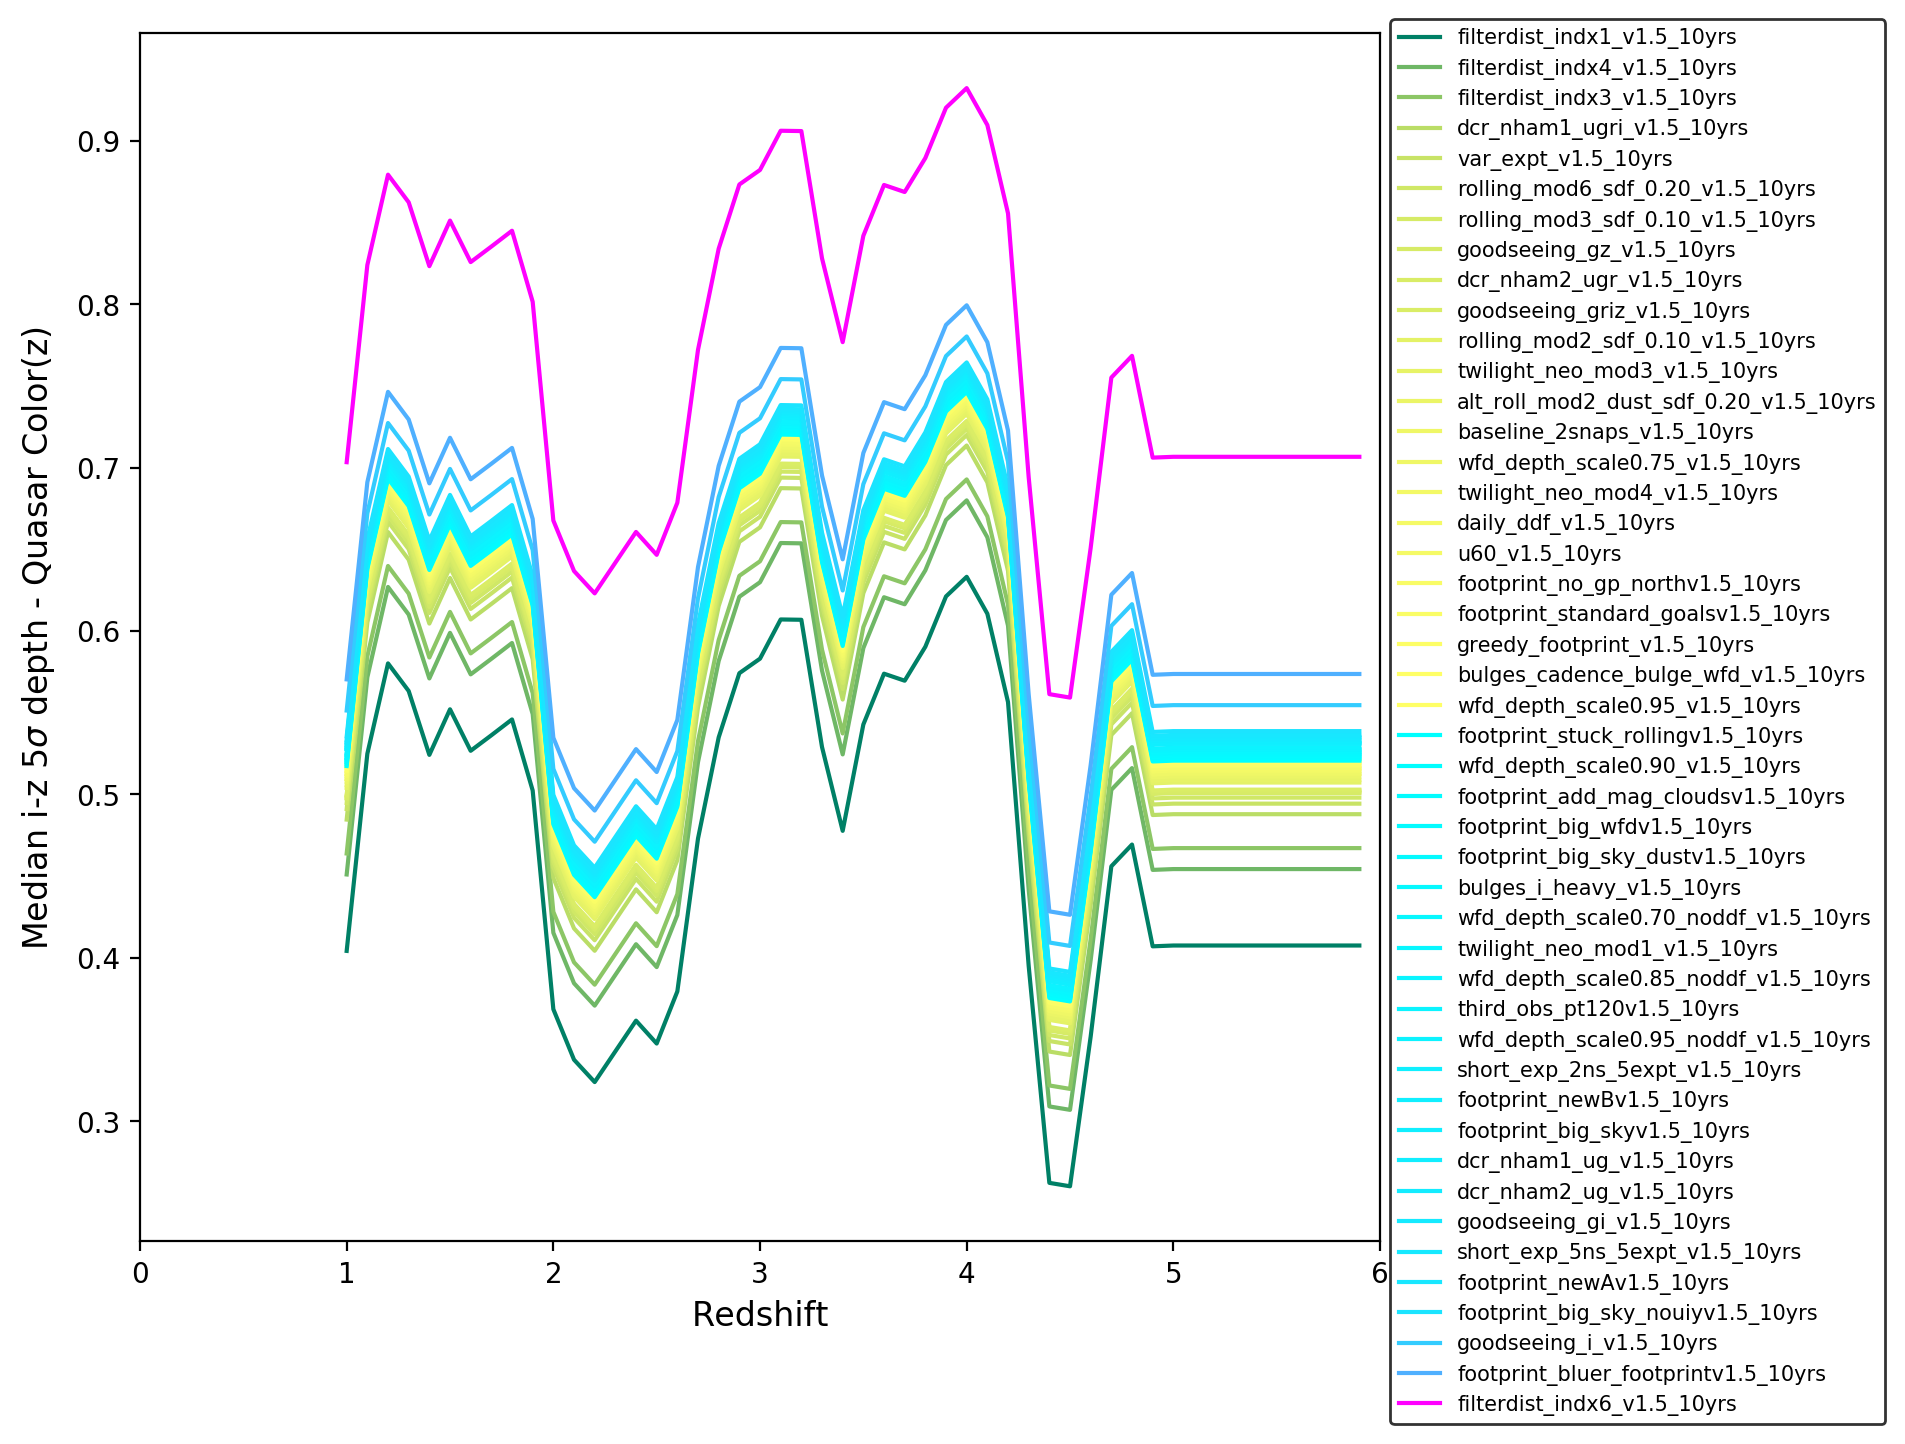

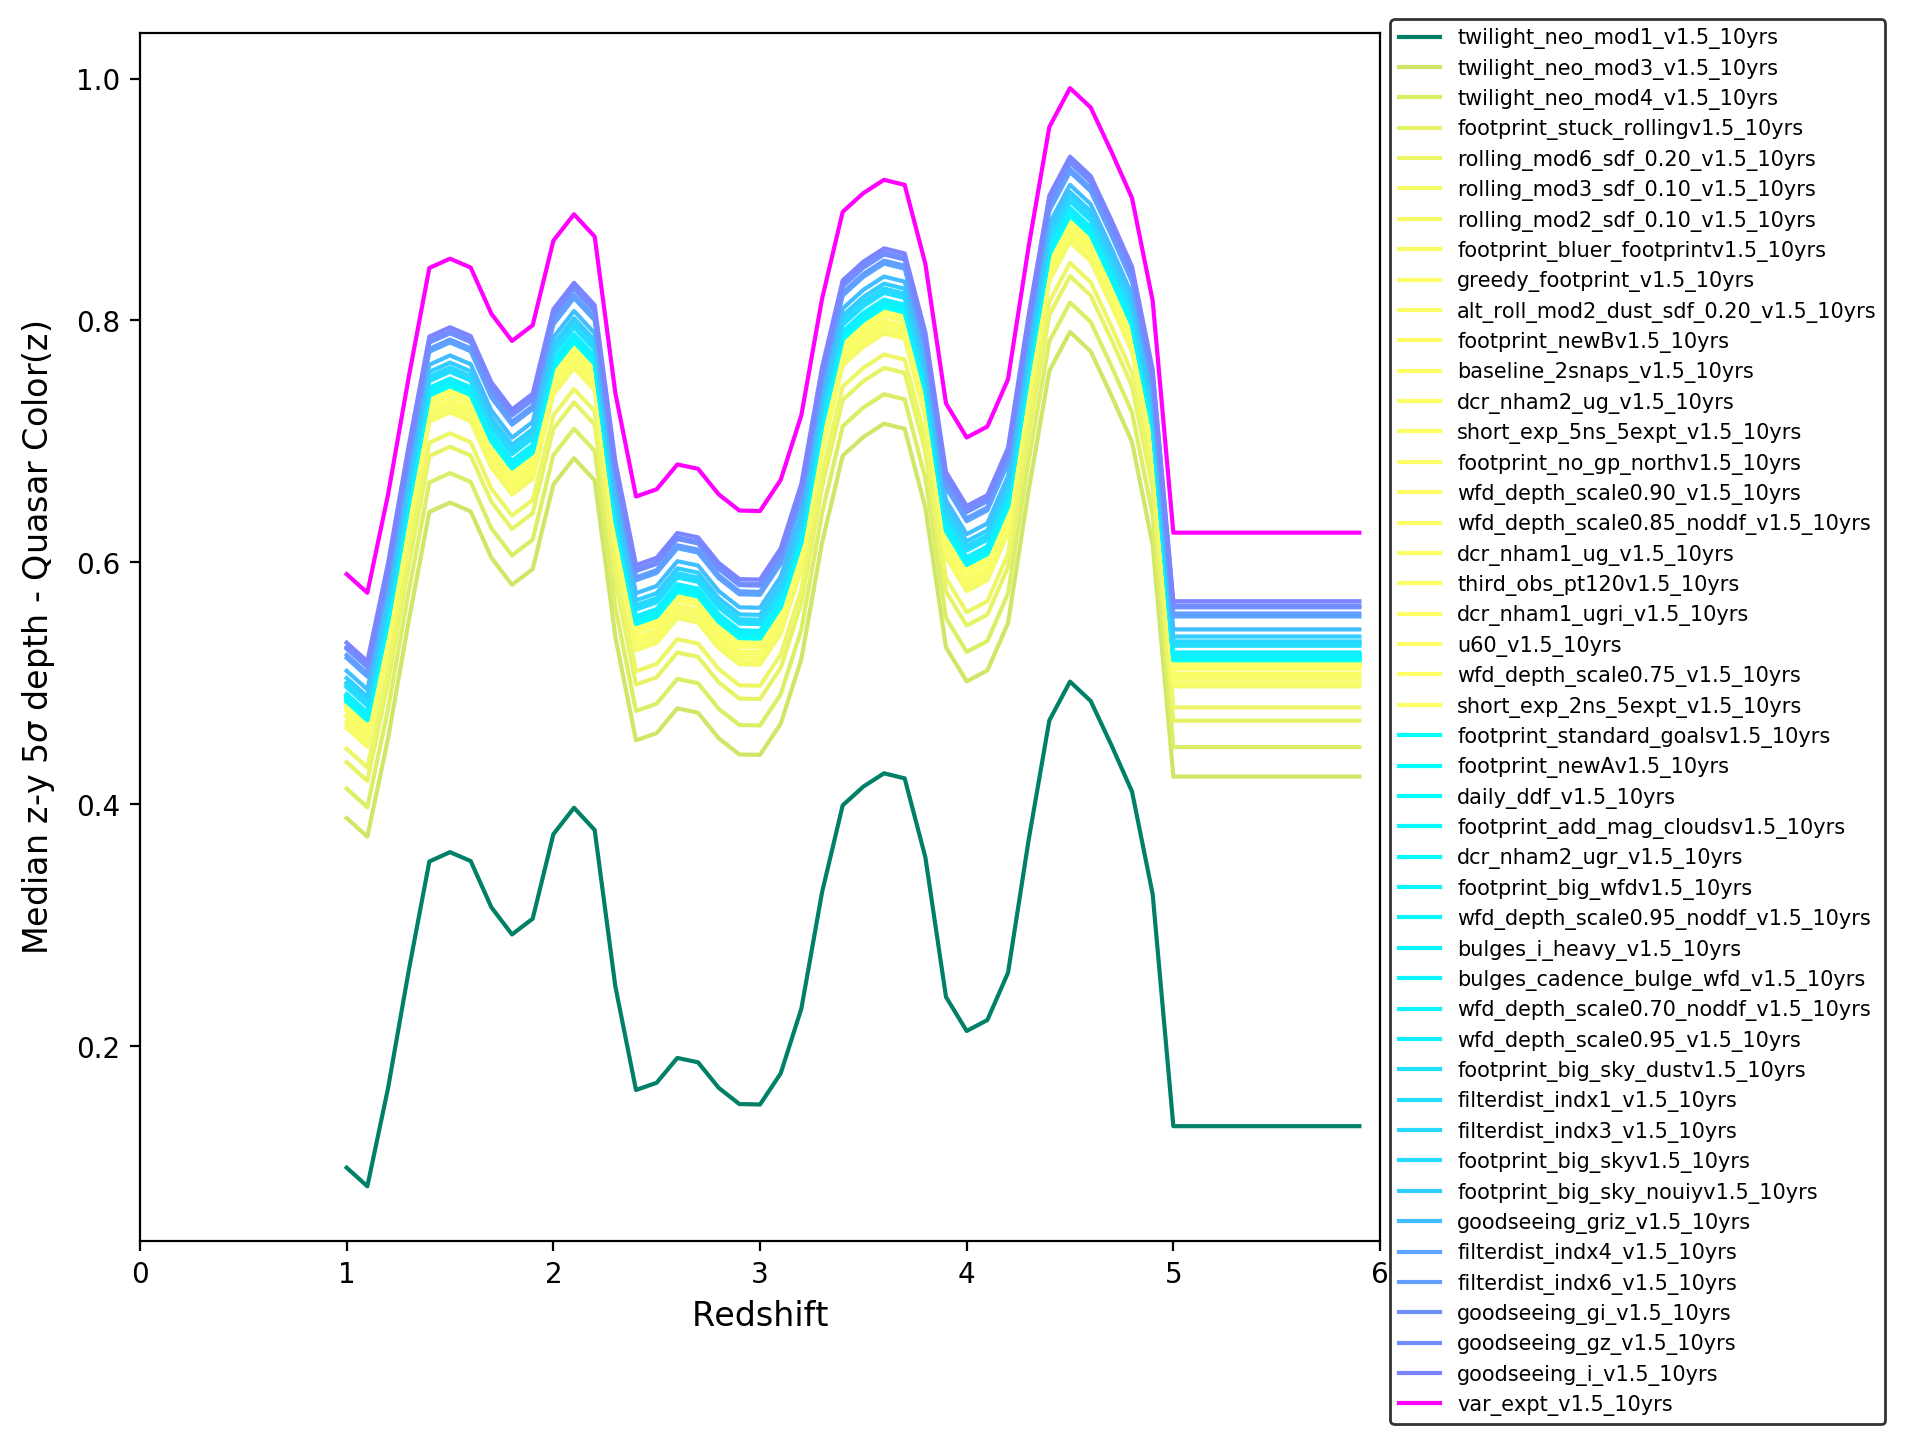

In [43]:
for Key in Keys:
    filter1 = Key[1][-7]
    filter2 = Key[1][-6]
    color_name = "{0}-{1}".format(filter1, filter2)
    quasar_colors = Temple_colors(color_name,zs,imag)
    ylabel = 'Median {} 5$\sigma$ depth - Quasar Color(z)'.format(color_name)
    plot_OpSims_color_excess_redshift(Key, bundleDicts, zs, quasar_colors,
                                      color_map=[mpl.cm.summer,mpl.cm.cool], ylabel=ylabel, 
                                      figsize=(8, 8), dpi=200, FBS="v1.5", datamin=zmin, datamax=zmax)